In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import scipy.stats

In [2]:
franchises = {"Brooklyn Nets": 1610612751, "Minnesota Timberwolves":1610612750 ,"Golden State Warriors": 1610612744, 
              "Los Angeles Clippers": 1610612746, "Los Angeles Lakers": 1610612747, "Washington Wizards": 1610612764, 
              "Milwaukee Bucks": 1610612749, "Toronto Raptors": 1610612761, "Philadelphia 76ers": 1610612755 , 
              "Boston Celtics":1610612738 ,  "Orlando Magic": 1610612753, "Atlanta Hawks":1610612737,
              "Houston Rockets": 1610612745 , "San Antontio Spurs":  1610612759, "New Orleans Pelicans": 1610612740, 
              "Pheonix Suns": 1610612756, "Sacramento Kings": 1610612758, "Portland Trailblazers": 1610612757, 
              "Denver Nuggets":1610612743 , "Memphis Grizzlies": 1610612763, "Miami Heat":1610612748, 
              "Cleveland Cavaliers": 1610612739, "Charlotte Hornets":1610612766, "Chicago Bulls": 1610612741, 
              "New York Knicks": 1610612752, "Indiana Pacers":1610612754 , "Utah Jazz":1610612762 , 
              "Detroit Pistons": 1610612765, "Dallas Mavericks": 1610612742, "Oklahoma City Thunder": 1610612760,  
             }
num_wins = {"Brooklyn Nets": 28, 
              "Minnesota Timberwolves":47 ,
              "Golden State Warriors": 58, 
              "Los Angeles Clippers": 42, 
              "Los Angeles Lakers": 35, 
              "Washington Wizards": 43, 
              "Milwaukee Bucks": 44, 
              "Toronto Raptors": 59, 
              "Philadelphia 76ers": 52 , 
              "Boston Celtics":55 ,  
              "Orlando Magic": 29, "Atlanta Hawks":24,
              "Houston Rockets": 65, 
              "San Antontio Spurs":  47, 
              "New Orleans Pelicans": 48, 
              "Pheonix Suns": 21, 
              "Sacramento Kings": 27, 
              "Portland Trailblazers": 49, 
              "Denver Nuggets":46 , 
              "Memphis Grizzlies": 22, 
              "Miami Heat":44, 
              "Cleveland Cavaliers": 50, 
              "Charlotte Hornets":36,
              "Chicago Bulls": 27, 
              "New York Knicks": 29, 
              "Indiana Pacers":48 , 
              "Utah Jazz":48 , 
              "Detroit Pistons": 39, 
              "Dallas Mavericks": 24, "Oklahoma City Thunder": 48,  
             }
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]

In [3]:
players = {}
ids = {}
teams = {}
with open("data/players.json") as f:
    data = json.load(f)

for row in data:
    if (row['lastName'] == ""):
        name = row["firstName"]
    else:
        name = row['lastName']+", "+row["firstName"]
    iden = str(row['playerId'])
    players[name] = iden
    ids[iden] = name
    teams[iden] = row['teamId']

In [4]:
def degrees_passing(team_id, win):
    out_deg = {}
    in_deg = {}
    tots = {}
    for name in players:
        iden = players[name]
        if (teams[iden] != team_id):
            continue
        if (iden not in out_deg):
            out_deg[iden] = 0
        if (win == True):
            fname = "data/"+players[name]+"-passing-win.json"
        elif (win == False):
            fname = "data/"+players[name]+"-passing-loss.json"
        else:
            fname = "data/"+players[name]+"-passing.json"
    
        with open(fname, "r") as f:
            data = json.load(f)
        for key in data:
            if (teams[key] != team_id):
                continue
            out_deg[iden] += data[key][0]
            if (key not in in_deg):
                in_deg[key] = 0
            in_deg[key] += data[key][0]

    for key in in_deg:
        tots[key] = in_deg[key]+out_deg[key]
     
    active_vals = sorted(tots.values(), reverse=True)[:8]
    active = []
    for fl in tots:
        if tots[fl] in active_vals:
            active.append(fl)
    pl_ids = list(in_deg)
    for key in pl_ids:
        if key not in active:
            del out_deg[key]
            del in_deg[key]
    
    return out_deg, in_deg

In [5]:
# x = []
# y = []
# colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#         "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
#         "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
# plt.figure(figsize=(15,15))
# for team in franchises:
#     out,inn = degrees_passing(franchises[team], None)
#     xx = num_wins[team]
#     yy = np.max(list(out.values()))
#     x.append(xx)
#     y.append(yy)
#     plt.annotate(team,(xx,yy), fontsize=7)
    
# plt.scatter(x,y,c=colors)
# plt.title("Max out degree correlated with wins")
# plt.xlabel("Wins")
# plt.ylabel("Maximum out degree (avg passes per game)")

# b,m,r,p,_ = scipy.stats.linregress(x,y)
# y = np.poly1d([b,m])(np.arange(74))
# print(r*r,p)
# plt.plot(np.arange(74),y)
# plt.savefig("out/max-out-win-corr.png")
# plt.show()

0.39658160410301535 0.036672897907232625


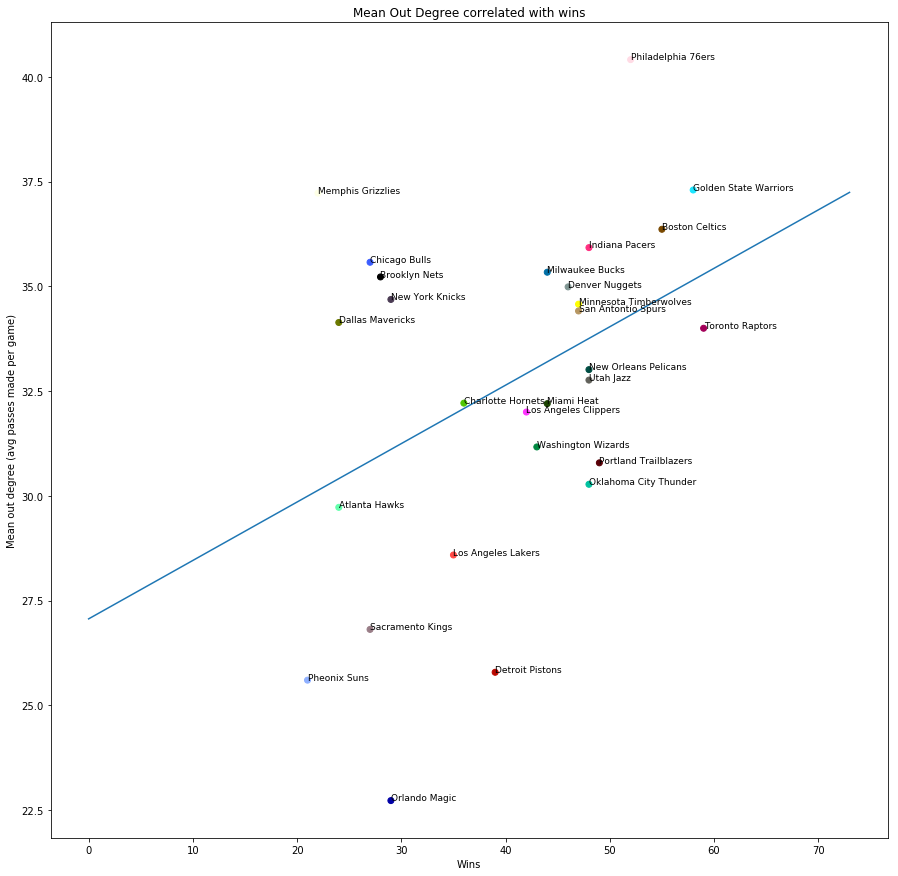

In [19]:
y = []
x = []
outliers = {}
plt.figure(figsize=(15,15))
for team in franchises:
    out,inn = degrees_passing(franchises[team], None)
    outliers[team]= np.mean(list(out.values()))
    if (team == "Cleveland Cavaliers" or team == "Houston Rockets"):
        continue
    xx = num_wins[team]
    yy = np.mean(list(out.values()))
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=9)
    
plt.scatter(x,y,c=colors)
plt.title("Mean Out Degree correlated with wins")
plt.xlabel("Wins")
plt.ylabel("Mean out degree (avg passes made per game)")

b,m,r,p,_ = scipy.stats.linregress(x,y)
y = np.poly1d([b,m])(np.arange(74))
print(r,p)
plt.plot(np.arange(74),y)

plt.savefig("out/mean-out-win-corr.png")
plt.show()

0.10870535051182491 0.5818904519131907


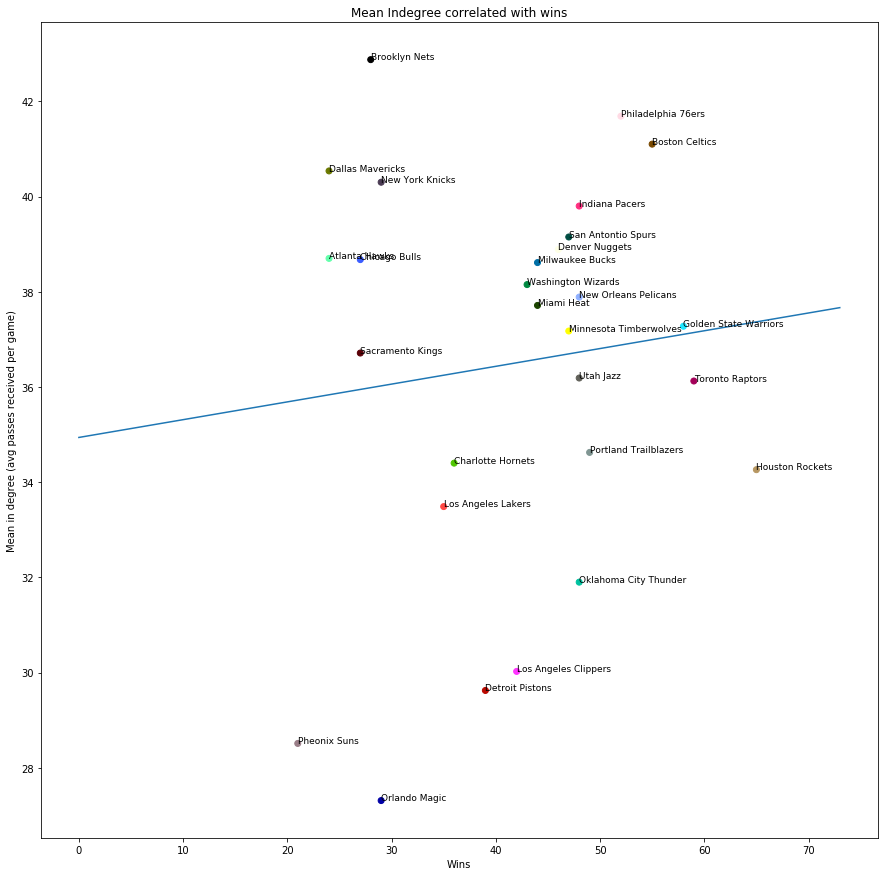

In [7]:
y = []
x = []
plt.figure(figsize=(15,15))
for team in franchises:
    if (team == "Memphis Grizzlies" or team == "Cleveland Cavaliers"):
        continue
    out,inn = degrees_passing(franchises[team], None)
    xx = num_wins[team]
    yy = np.mean(list(inn.values()))
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=9)
    
plt.scatter(x,y,c=colors)
plt.title("Mean Indegree correlated with wins")
plt.xlabel("Wins")
plt.ylabel("Mean in degree (avg passes received per game)")
b,m,r,p,_ = scipy.stats.linregress(x,y)
y = np.poly1d([b,m])(np.arange(74))
print(r,p)
plt.plot(np.arange(74),y)
plt.savefig("out/mean-in-win-corr.png")
plt.show()